In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

df=pd.read_csv(r"C:\Users\gouth\Desktop\Goutham\SPDS\Python\DataSet\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


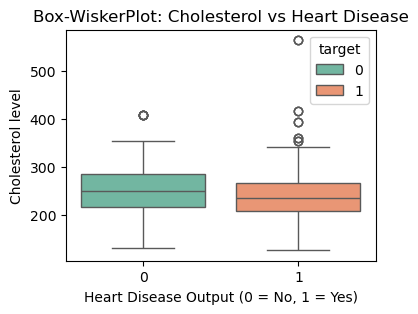

In [2]:
#Box-Wiskerplot
plt.figure(figsize = (4,3))
sns.boxplot(x='target', 
            y='chol',
            hue='target',
            data = df, 
            palette = 'Set2'
           )
plt.title("Box-WiskerPlot: Cholesterol vs Heart Disease")
plt.xlabel("Heart Disease Output (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol level")
plt.show()


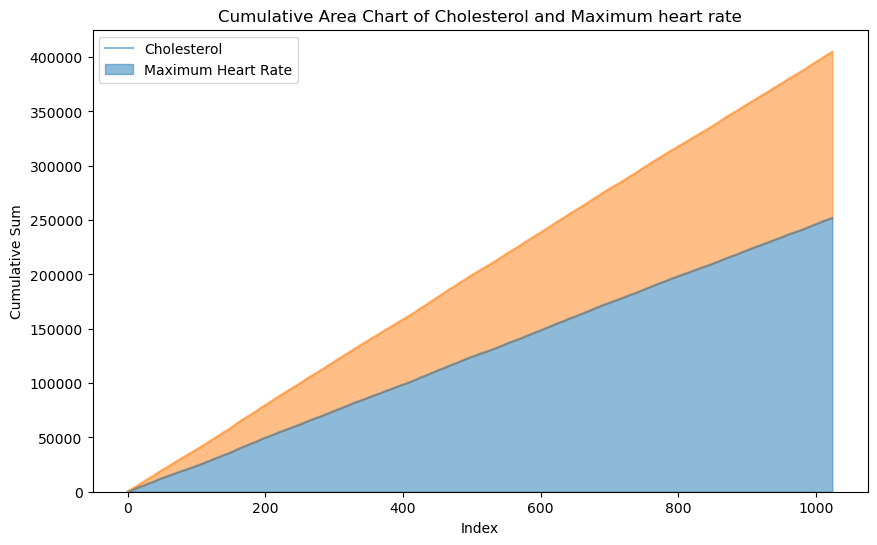

In [3]:
#Area Chart
df[['chol', 'thalach']].cumsum().plot.area(alpha=0.5, 
                                           figsize=(10, 6)
                                          )
plt.title('Cumulative Area Chart of Cholesterol and Maximum heart rate')
plt.xlabel('Index')
plt.ylabel('Cumulative Sum')
plt.legend(["Cholesterol", "Maximum Heart Rate"])
plt.show()

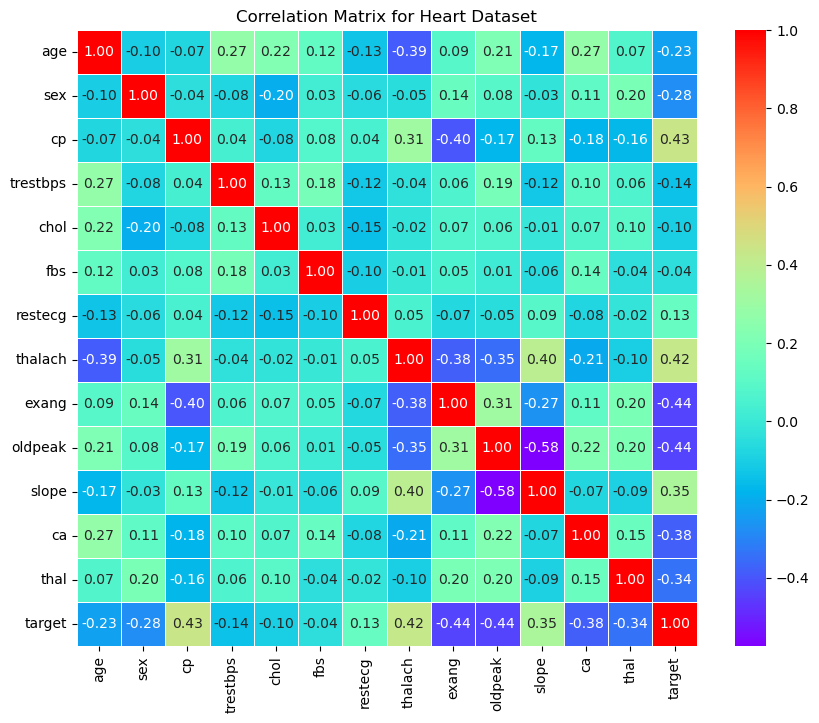

In [4]:
#Correlation Matrix
correlation_matrix = df.corr()
plt.figure (figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot = True, 
            cmap = 'rainbow', 
            fmt = '.2f', 
            linewidths = 0.5)
plt.title('Correlation Matrix for Heart Dataset')
plt.show()

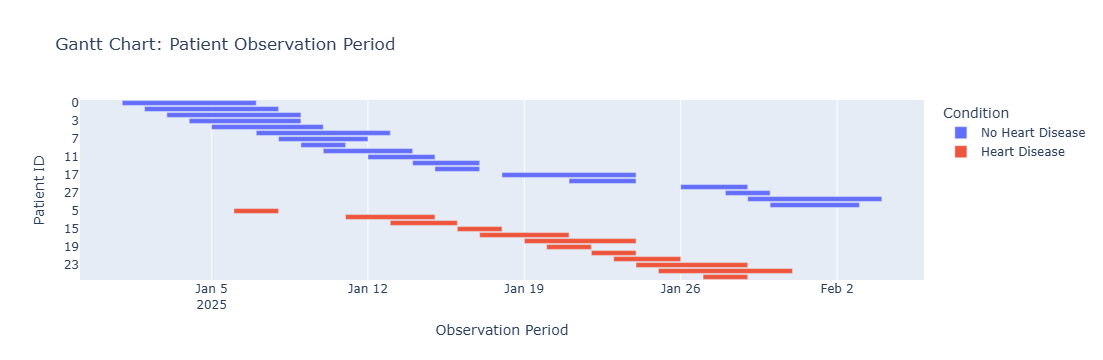

In [17]:
#Gantt Chart
df_gantt = df.copy()
df_gantt["Patient_ID"] = df_gantt.index.astype(str)
df_gantt["Start_Day"] = pd.to_datetime("2025-01-01") + pd.to_timedelta(df_gantt.index, unit="D")
df_gantt["End_Day"] = df_gantt["Start_Day"] + pd.to_timedelta(np.random.randint(2, 7, size=len(df)), unit="D")
df_gantt["target_label"] = df_gantt["target"].map({0: "No Heart Disease", 1: "Heart Disease"})
fig = px.timeline(
    df_gantt.head(30),
    x_start="Start_Day",
    x_end="End_Day",
    y="Patient_ID",
    color="target_label",
    title="Gantt Chart: Patient Observation Period",
    labels={"target_label": "Condition"}
)
fig.update_yaxes(autorange="reversed")
fig.update_layout(xaxis_title="Observation Period", yaxis_title="Patient ID")
fig.show()

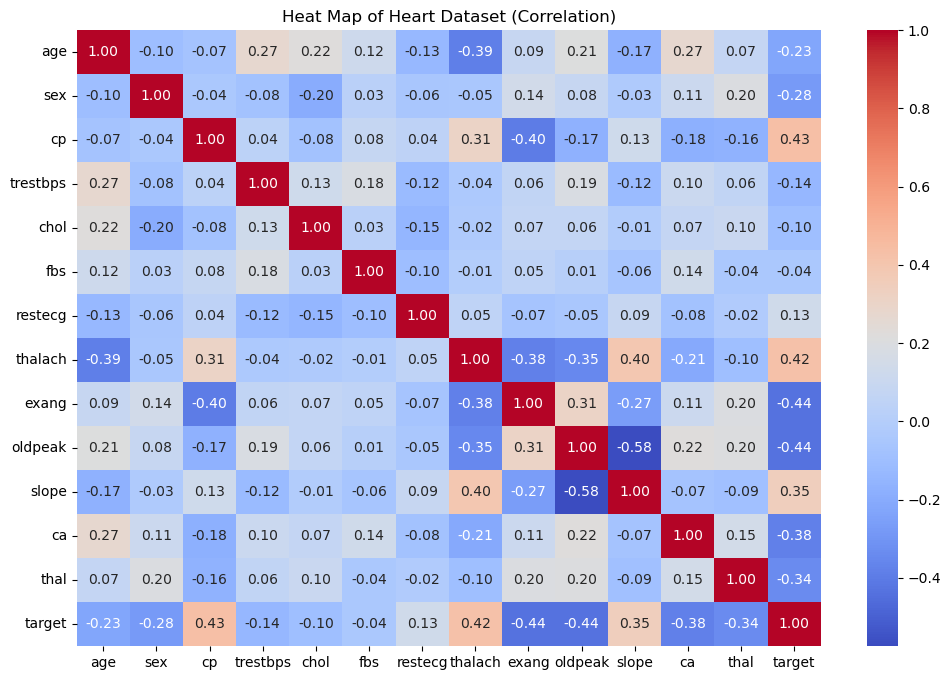

In [20]:
#Heat map
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr,
            annot=True,
            cmap="coolwarm",
            fmt=".2f")
plt.title("Heat Map of Heart Dataset (Correlation)")
plt.show()